In [0]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

%matplotlib inline

In [0]:
dataset = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv"
df = pd.read_csv(dataset)

In [0]:
df['PrevClose'] = df['close'].shift(1)

In [4]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [0]:
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']

In [6]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


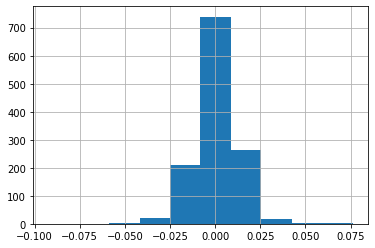

In [7]:
df['Return'].hist()

In [0]:
series = df['Return'].values[1:].reshape(-1, 1) # Skipping the first row since the first value is NaN

scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [9]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,D)
Y = np.array(Y)
N = len(X)

print ("X.shape: {} Y.shape: {}".format(X.shape,Y.shape))

X.shape: (1248, 10, 1) Y.shape: (1248,)


In [12]:
i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.01))

r = model.fit(X[:-N//2],Y[:-N//2],epochs=100,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/100
20/20 [==============================] - 1s 31ms/step - loss: 0.9962 - val_loss: 1.1445
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.9875 - val_loss: 1.1382
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 0.9862 - val_loss: 1.1412
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.9849 - val_loss: 1.1468
Epoch 5/100
20/20 [==============================] - 0s 15ms/step - loss: 0.9872 - val_loss: 1.1468
Epoch 6/100
20/20 [==============================] - 0s 9ms/step - loss: 0.9833 - val_loss: 1.1441
Epoch 7/100
20/20 [==============================] - 0s 9ms/step - loss: 0.9809 - val_loss: 1.1619
Epoch 8/100
20/20 [==============================] - 0s 9ms/step - loss: 0.9867 - val_loss: 1.1479
Epoch 9/100
20/20 [==============================] - 0s 8ms/step - loss: 0.9791 - val_loss: 1.1559
Epoch 10/100
20/20 [==============================] - 0s 9ms/step - loss: 0.9788 - val_loss: 1.1520
Epoch 1

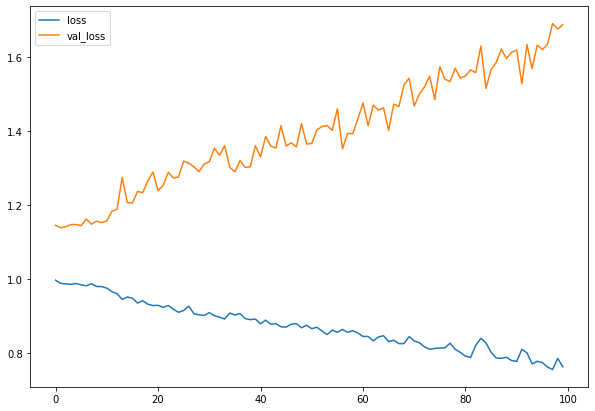

In [14]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

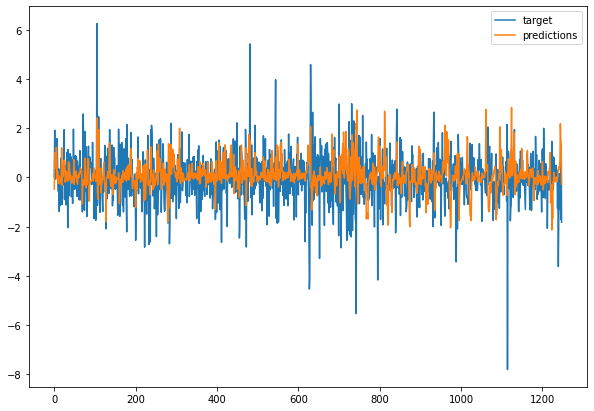

In [17]:
outputs = model.predict(X)
predictions = outputs[:,0]
plt.figure(figsize=(10,7))
plt.plot(Y,label='target')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

In [0]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,T,1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

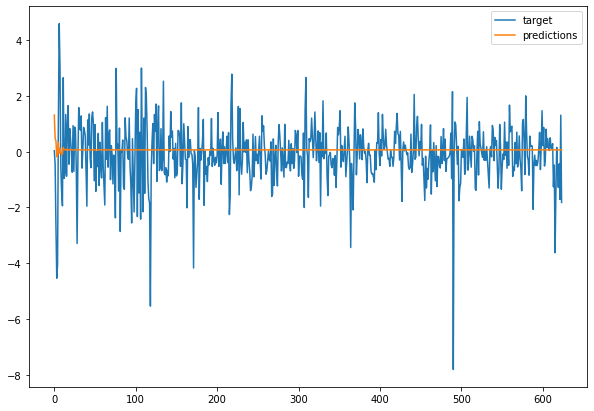

In [20]:
plt.figure(figsize=(10,7))
plt.plot(validation_target,label='target')
plt.plot(validation_predictions,label='predictions')
plt.legend()
plt.show()

The Way correct but we need to do something more to make the proper predictions